In [1]:
# NOTES FOR ANALYSIS:

# why BTC went parabolic in 2020 -- covid, printing $, distrust in dollar/banks/market, store of value, innovation
# talk about why inflation / CPI has gone up and why it's the highest it's been in decades (source for 6% number)
# talk about why $SPY went crazy after it's dump in covid - printing, inflation, etc.
# what this all means combined going forward ^^

This is the BTC dataset:
            date      priceUsd
0     2016-01-02    433.122241
1     2016-01-03    429.271387
2     2016-01-04    431.697161
3     2016-01-05    432.458571
4     2016-01-06    430.480641
...          ...           ...
1870  2021-02-15  47862.737815
1871  2021-02-16  48845.935666
1872  2021-02-17  50915.629975
1873  2021-02-18  51904.872072
1874  2021-02-19  53076.058942

[1875 rows x 2 columns]


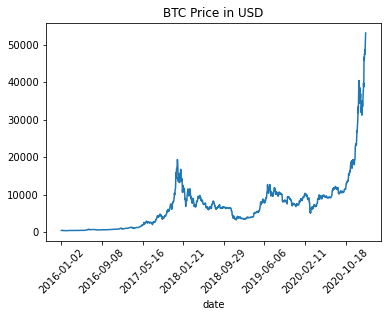

----------------------------------------------------------------------------------
The price of BTC has increased 12154.290802397287 % in the past 5 years.
If you invested $1,000 in 2016 into BTC, you'd now have $121542.90802397286 in today's dollars.
----------------------------------------------------------------------------------
This is the S&P 500 ETF dataset:
             1. open   2. high    3. low  4. close  5. adjusted close  \
2016-01-29  200.4900  201.9000  181.0200  193.7200           174.0895   
2016-02-29  192.5300  196.6800  181.0900  193.5600           173.9457   
2016-03-31  195.0100  206.8700  194.4500  205.5200           185.6422   
2016-04-29  204.3500  210.9200  203.0900  206.3300           186.3739   
2016-05-31  206.9200  210.6900  202.7800  209.8400           189.5444   
...              ...       ...       ...       ...                ...   
2021-08-31  440.3400  453.0700  436.1000  451.5600           450.1037   
2021-09-30  452.5600  454.0500  428.7800  429.14

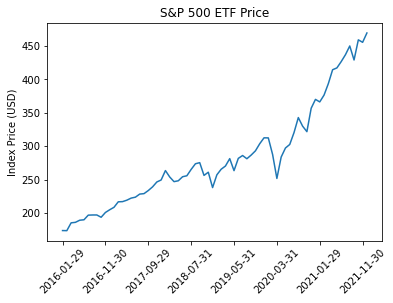

---------------------------------------------------------------------------------
The price of $SPY has increased 163.80109081822857 % in the past 5 years.
If you invested $1,000 in 2016 into the S&P 500 ETF, you'd now have $1638.0109081822857 in today's dollars.
---------------------------------------------------------------------------------
This is the CPI dataset:
         Series_ID  Year Period    Value
0      CUSR0000SA0  1947    M01   21.480
1      CUSR0000SA0  1947    M02   21.620
2      CUSR0000SA0  1947    M03   22.000
3      CUSR0000SA0  1947    M04   22.000
4      CUSR0000SA0  1947    M05   21.950
...            ...   ...    ...      ...
59012  CUUSS49GSA0  2020    S01  225.049
59013  CUUSS49GSA0  2020    S02  227.258
59014  CUUSS49GSA0  2020    S03  226.153
59015  CUUSS49GSA0  2021    S01  232.679
59016         None     0   None    0.000

[59017 rows x 4 columns]


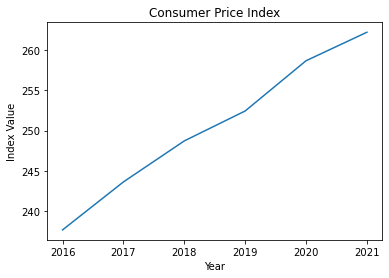

------------------------------------------------------------------------------
We see a 10.342433474155492 % increase in inflation during the past 5 years.
To hedge against inflation, we would need to earn a ROI greater than this.
What cost you $1,000 to buy in 2016 now costs you $1103.424334741555 today.
------------------------------------------------------------------------------


In [2]:
# Rustin Shamloo, DSCI 510 Final Project

# Dataset 1 - CoinCap API 2.0
# Source: https://docs.coincap.io/

import requests
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

def scrape_coinbase():
    url = "https://api.coincap.io/v2/assets/bitcoin/history?interval=d1&start=1451635200000&end=1613753794000"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers = headers, data = payload)
    json_data = json.loads(response.text.encode('utf8'))
    bitcoin_data = json_data["data"]
    df = pd.DataFrame(bitcoin_data)
    df = pd.DataFrame(bitcoin_data, columns = ['date', 'priceUsd'])
    df['priceUsd'] = pd.to_numeric(df['priceUsd'], errors = 'coerce').fillna(0, downcast = 'infer')
#     df.describe()
    for i in range(len(df)):
        df['date'].values[i] = df['date'].values[i].split('T')[0]
    print("This is the BTC dataset:")
    print(df)
    # df.to_csv('bitcoin-usd.csv', index = False)
    df.plot(x = 'date', y = 'priceUsd', kind = 'line', legend=None)
    plt.xticks(rotation=45)
    plt.title("BTC Price in USD")
    plt.show()
    change = ((53076.058942 - 433.122241) / 433.122241) * 100
    pct_x = (change / 100) * 1000
    print('----------------------------------------------------------------------------------')
    print('The price of BTC has increased ' + str(change) + " % in the past 5 years.")
    print("If you invested $1,000 in 2016 into BTC, you'd now have $" + str(pct_x) + " in today's dollars.")
    print('----------------------------------------------------------------------------------')

scrape_coinbase()

############################################################# 

# Dataset 2 - S&P 500 API
# Source: https://www.alphavantage.co/documentation/
# My free API Key is NR99A3HDFECIUH3T
import pandas as pd
import matplotlib.pyplot as plt
import requests

def scrape_stocks():
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=SPY&apikey=NR99A3HDFECIUH3T'
    r = requests.get(url)
    data = r.json()
    data = data['Monthly Adjusted Time Series']
    df = pd.DataFrame(data)
    df = df.transpose()
    df = df.iloc[::-1]
    df['5. adjusted close'] = pd.to_numeric(df['5. adjusted close'], errors = 'coerce').fillna(0, downcast = 'infer')
    pd.to_datetime(df.index)
    # df.to_csv('sp500-final.csv', index = False)
    df2 = df[df.index > '2016-01-01']
    print("This is the S&P 500 ETF dataset:")
    print(df2)
    df2.plot(y = '5. adjusted close', kind = 'line', legend=None)
    plt.ylabel("Index Price (USD)")
    plt.title("S&P 500 ETF Price")
    plt.xticks(rotation=45)
    plt.show()
    change = ((459.2500 - 174.0895) / 174.0895) * 100
    pct_x = (change / 100) * 1000
    print('---------------------------------------------------------------------------------')
    print('The price of $SPY has increased ' + str(change) + " % in the past 5 years.")
    print("If you invested $1,000 in 2016 into the S&P 500 ETF, you'd now have $" + str(pct_x) + " in today's dollars.")
    print('---------------------------------------------------------------------------------')
    
scrape_stocks()

#############################################################    

# Dataset 3 - BLS.gov CPI 
# Source: https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def scrape_inflation():
    content = requests.get('https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems')
    soup = BeautifulSoup(content.content, 'html.parser')
    text = soup.get_text()
    text_spl = text.split('\n')
    lst = []
    for row in text_spl:
        row_spl = [value.strip() for value in row.split()]
        lst.append(row_spl)
    df = pd.DataFrame(lst[1:], columns = ['Series_ID', 'Year', 'Period', 'Value'])
    df = df.astype(str)
    df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce').fillna(0, downcast = 'infer')
    df['Year'] = pd.to_numeric(df['Year'], errors = 'coerce').fillna(0, downcast = 'infer')
    print("This is the CPI dataset:")
    print(df)
    # df.to_csv('inflation.csv', index = False)
    df = df[df['Year'] >= 2016]
    df = df[df['Period'] == 'M01']
    df = df[df['Series_ID'] == 'CUSR0000SA0']
    # df.to_csv('inflation.csv', index = False)
    df.plot(x = 'Year', y = 'Value', kind = 'line', legend = None)
    plt.ylabel("Index Value")
    plt.xlabel("Year")
    plt.title("Consumer Price Index")
    plt.show()
    percent_change = ((262.231 - 237.652) / 237.652) * 100
    pv = (1 + (percent_change / 100)) * 1000
    print('------------------------------------------------------------------------------')
    print('We see a ' + str(percent_change) + ' % increase in inflation during the past 5 years.')
    print('To hedge against inflation, we would need to earn a ROI greater than this.')
    print('What cost you $1,000 to buy in 2016 now costs you $' + str(pv) + " today.")
    print('------------------------------------------------------------------------------')
       
scrape_inflation()

##############################################

import requests
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt

def scrape_coinbase_head():
    url = "https://api.coincap.io/v2/assets/bitcoin/history?interval=d1&start=1451635200000&end=1613753794000"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers = headers, data = payload)
    json_data = json.loads(response.text.encode('utf8'))
    bitcoin_data = json_data["data"]
    df = pd.DataFrame(bitcoin_data)
    df = pd.DataFrame(bitcoin_data, columns = ['date', 'priceUsd'])
    df['priceUsd'] = pd.to_numeric(df['priceUsd'], errors = 'coerce').fillna(0, downcast = 'infer')
    for i in range(len(df)):
        df['date'].values[i] = df['date'].values[i].split('T')[0]
    print(df.head())

###############################################

import pandas as pd
import matplotlib.pyplot as plt
import time

def scrape_stocks_head():
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=SPY&apikey=NR99A3HDFECIUH3T'
    r = requests.get(url)
    data = r.json()
    data = data['Monthly Adjusted Time Series']
    df = pd.DataFrame(data)
    df = df.transpose()
    df = df.iloc[::-1]
    df['5. adjusted close'] = pd.to_numeric(df['5. adjusted close'], errors = 'coerce').fillna(0, downcast = 'infer')
    pd.to_datetime(df.index)
    df2 = df[df.index >= '2016-01-01']
    print(df2.head())

#################################################
     
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def scrape_inflation_head():
    content = requests.get('https://download.bls.gov/pub/time.series/cu/cu.data.1.AllItems')
    soup = BeautifulSoup(content.content, 'html.parser')
    text = soup.get_text()
    text_spl = text.split('\n')
    lst = []
    for row in text_spl:
        row_spl = [value.strip() for value in row.split()]
        lst.append(row_spl)
    df = pd.DataFrame(lst[1:], columns = ['Series_ID', 'Year', 'Period', 'Value'])
    df = df.astype(str)
    df['Value'] = pd.to_numeric(df['Value'], errors = 'coerce').fillna(0, downcast = 'infer')
    df['Year'] = pd.to_numeric(df['Year'], errors = 'coerce').fillna(0, downcast = 'infer')
    print(df.head())
    df = df[df['Year'] >= 2016]
    df = df[df['Period'] == 'M01']
    df = df[df['Series_ID'] == 'CUSR0000SA0']
    
#################################################

import sys
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import csv
import json

def default_function():
    print('This is the scraped Coinbase dataset:')
    scrape_coinbase()
    print('This is the scraped S&P500 ETF dataset:')
    scrape_stocks()
    print('This is the scraped Inflation dataset:')
    scrape_inflation()

def scrape_function():
    print('This is a sample of the scraped Coinbase dataset:')
    scrape_coinbase_head()
    print('This is a sample of the scraped S&P500 ETF dataset:')
    scrape_stocks_head()
    print('This is a sample of the scraped Inflation dataset:')
    scrape_inflation_head()

def static_function():
    print('This is a sample of the static Bitcoin dataset:')
    fhand = open('bitcoin-usd.csv', 'r')
    lines = fhand.readlines()
    for row in range(5):
        print(lines[row])

    print('This is a sample of the static S&P500 ETF dataset:')
    fhand = open('sp500-final.csv', 'r')
    lines = fhand.readlines()
    for row in range(5):
        print(lines[row])
            
    print('This is a sample of the static Inflation dataset:')
    fhand = open('inflation.csv', 'r')
    lines = fhand.readlines()
    for row in range(5):
        print(lines[row])
        
if __name__ == '__main__':
    if len(sys.argv) == 1:
        default_function()
        
    elif sys.argv[1] == '--scrape':
        scrape_function()

    elif sys.argv[1] == '--static':
        static_function()
#         path_to_static_data = sys.argv[2]


In [12]:
# see if change in CPI correlates with buying more BTC
# pip install seaborn
import seaborn as sns
sns.lmplot(x = 'date', y = 'priceUsd', data = bitcoin_data, fit_reg = True)

In [ ]:
## Old Alternative Code for Stocks:

#     api_key = 'NR99A3HDFECIUH3T'
#     ts= TimeSeries(key = api_key, output_format = 'pandas')
#     data, meta_data = ts.get_intraday(symbol = 'SPY', interval = '1min', outputsize = 'full')
#     ###############
#     #ts.get_daily,weekly,intraday,daily_adjusted,weekly_adjusted, etc...
#     #SPX does not work, do SPY (SPDR S&P500 ETF Trust will do, with $256B in assets)
#     # print(data)
#     df = pd.DataFrame(data)
#     df.to_csv('index-price.csv', index = False)
#     print(df)
#     # print(df.sample)
#     # df.dtypes #all floats, which is what we want
#     # df.info()
    
#     df.to_csv('index-price.csv', index = False)
    
#     df.plot(y = '4. close', kind = 'line', legend=None)
#     plt.ylabel("Index Price (USD)")
#     plt.title("S&P 500 ETF Price")
#     plt.show()
    # need to change date parameters/granularity
    # Seaborn might look better
    
#         #calculating percent change to look at volatility and, in turn, volume
#     close_data = df['4. close']
#     percent_change = close_data.pct_change() #volatility/variance in price
#     #current granularity: hourly (change)
#     # print(percent_change)
#     print('---------------------------------------------------------------')

#     last_change = percent_change[-1]
#     if abs(last_change) > 0.000001: #insanely low % just to see
#         print("The price changed by: " + str(last_change) + " in the last minute")
     
#     print('---------------------------------------------------------------')